# **Overview:**

Chương trình này là tiếp nối của chương trình Part-2_Visualization.ipynb

Chương trình là thử nghiệm các mô hình Machine Learning trên tập dữ liệu đã được xử lý cũng như có cái nhìn tổng quan từ 2 phần trước.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **6. Khai báo và cài đặt cần sử dụng**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from datetime import datetime
import warnings

In [ ]:
from pylab import rcParams

rcParams['figure.figsize'] = 16,9

### **Đọc dữ liệu**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit_Scoring/Test/13.12/data_filled.csv')

In [ ]:
df

,Unnamed: 0,LoanBriefID,LoanAmount,LoanTime,IsReMarketing,ProvinceId,Gender,Age,JobId,ImcomeType,IsMerried,NumberBaby,RelationshipType,LivingWith,RateTypeId,ProductId,ResidentType,LoanAmountExpertiseAI,NumberCall,score,label_result
0,0,1095199,30000000,12,0,1,0.0,31,123.0,1.0,1.0,1.0,1.0,1.0,10,5,6,48800000.0,0.0,1.0,True
1,1,950035,12000000,6,1,1,0.0,30,123.0,5.0,1.0,2.0,1.0,3.0,10,2,4,13600000.0,1.0,0.6,False
2,2,975972,10000000,9,1,1,0.0,29,123.0,1.0,1.0,1.0,1.0,2.0,10,5,4,24000000.0,1.0,0.9,True
3,3,943144,5000000,9,1,79,0.0,25,123.0,5.0,0.0,0.0,2.0,1.0,10,2,4,0.0,8.0,0.9,True
4,4,1015972,16000000,9,0,1,0.0,28,123.0,1.0,0.0,1.0,15.0,0.0,10,2,7,24100000.0,0.0,0.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,10195,1801710,12000000,12,0,26,0.0,35,123.0,5.0,1.0,2.0,1.0,0.0,13,2,14,17900000.0,0.0,0.9,True
10196,10196,1803670,10000000,12,0,1,0.0,34,126.0,1.0,1.0,3.0,9.0,1.0,13,5,14,28050000.0,0.0,0.9,True
10197,10197,1800734,10000000,12,0,79,0.0,31,123.0,1.0,0.0,0.0,4.0,0.0,13,2,14,33400000.0,0.0,0.9,True
10198,10198,1751348,7000000,12,0,1,0.0,35,126.0,1.0,1.0,2.0,1.0,2.0,13,2,15,10300000.0,0.0,0.7,True


**Kiểm tra độ quan trọng của đăc trưng (feature important)**

In [ ]:
df.columns

Index(['Unnamed: 0', 'LoanBriefID', 'LoanAmount', 'LoanTime', 'IsReMarketing',
       'ProvinceId', 'Gender', 'Age', 'JobId', 'ImcomeType', 'IsMerried',
       'NumberBaby', 'RelationshipType', 'LivingWith', 'RateTypeId',
       'ProductId', 'ResidentType', 'LoanAmountExpertiseAI', 'NumberCall',
       'score', 'label_result'],
      dtype='object')

In [ ]:
features = ['LoanAmount', 'LoanTime', 'IsReMarketing',
       'ProvinceId', 'Gender', 'Age', 'JobId', 'ImcomeType', 'IsMerried',
       'NumberBaby', 'RelationshipType', 'LivingWith', 'RateTypeId',
       'ProductId', 'ResidentType', 'LoanAmountExpertiseAI', 'NumberCall']

In [ ]:
X = df[features]
Y = df['label_result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf.feature_importances_

array([0.07513671, 0.1097236 , 0.01832856, 0.02526206, 0.0205851 ,
       0.12761399, 0.16730001, 0.0253846 , 0.01512835, 0.02590469,
       0.06829135, 0.03694697, 0.00536517, 0.02241154, 0.04012685,
       0.1685164 , 0.04797404])

<BarContainer object of 17 artists>

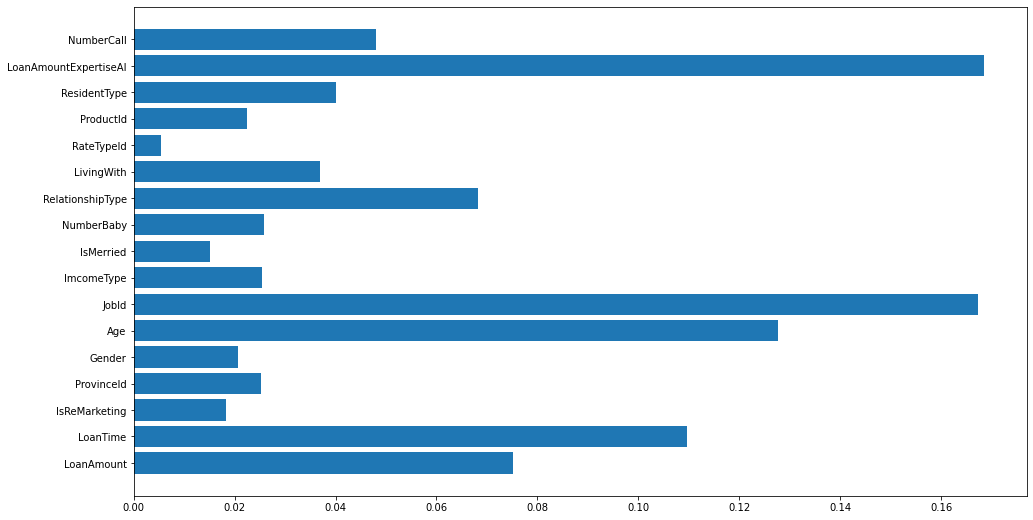

In [ ]:
plt.barh(features, rf.feature_importances_)

# **7. Huấn luyện mô hình - Classification**

**Split dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
print('Kích thước tập huấn luyện: ', X_train.shape, y_train.shape)
print('Kích thước tập kiểm tra: ', X_test.shape, y_test.shape)

Kích thước tập huấn luyện:  (7140, 17) (7140,)
Kích thước tập kiểm tra:  (3060, 17) (3060,)


In [ ]:
# Hàm tính độ chính xác, ma trận nhầm lẫn, Recall, precision, f1 score và vẽ đồ thị ROC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def evaluate_model(model, X_test, y_test, y_prediction):
  print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
  #Accuracy
  print("1. Accuracy:",metrics.accuracy_score(y_prediction,y_test))
  # confusion_matrix
  print('2. confusion_matrix:')
  print(confusion_matrix(y_prediction,y_test))
  # recall_score
  print('3. recall_score: ', recall_score(y_prediction,y_test))
  # precision_score
  print('4. precision_score: ', precision_score(y_prediction,y_test))
  # f1_score
  print('5. f1_score: ', f1_score(y_prediction,y_test))
  # ROC plot
  print('6. Biểu đồ ROC của mô hình:')
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.show()

**Logistic Regression**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.819281045751634
2. confusion_matrix:
[[   0    0]
 [ 553 2507]]
3. recall_score:  0.819281045751634
4. precision_score:  1.0
5. f1_score:  0.9006646308604275
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


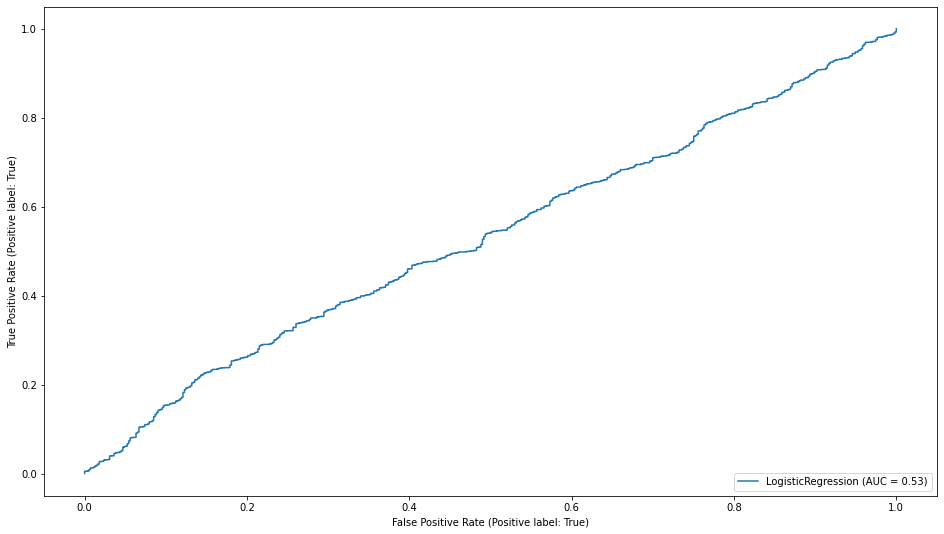

In [ ]:
#Given smote, we have to do a little adjustment
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.30, random_state=123)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(fit_intercept=True, penalty='l2')
logreg.fit(X_train, Y_train)

logregprediction=logreg.predict(X_test)

evaluate_model (logreg, X_test, y_test, logregprediction)
# #evaluation(Accuracy)
# print("Logistic Regression Accuracy:",metrics.accuracy_score(logregprediction,y_test))
# # confusion_matrix
# print('confusion_matrix:')
# print(confusion_matrix(logregprediction,y_test))
# # recall_score
# print('recall_score: ', recall_score(logregprediction,y_test))
# # precision_score
# print('precision_score: ', precision_score(logregprediction,y_test))
# # f1_score
# print('f1_score: ', f1_score(logregprediction,y_test))
# # ROC plot
# metrics.plot_roc_curve(logreg, X_test, y_test)
# plt.show()

In [ ]:
logregprediction

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
type(logregprediction)

numpy.ndarray

In [ ]:
logregprediction[0]

True

In [ ]:
type(logregprediction[0])

numpy.bool_

Nhận xét: Mô hình LR không dự báo tốt trong bài toàn này! Do mô hình đã dự báo tất cả nhãn là True!!!

**Linear Discriminant Analysis**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8199346405228758
2. confusion_matrix:
[[  75   73]
 [ 478 2434]]
3. recall_score:  0.8358516483516484
4. precision_score:  0.9708815317112086
5. f1_score:  0.8983207233806976
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


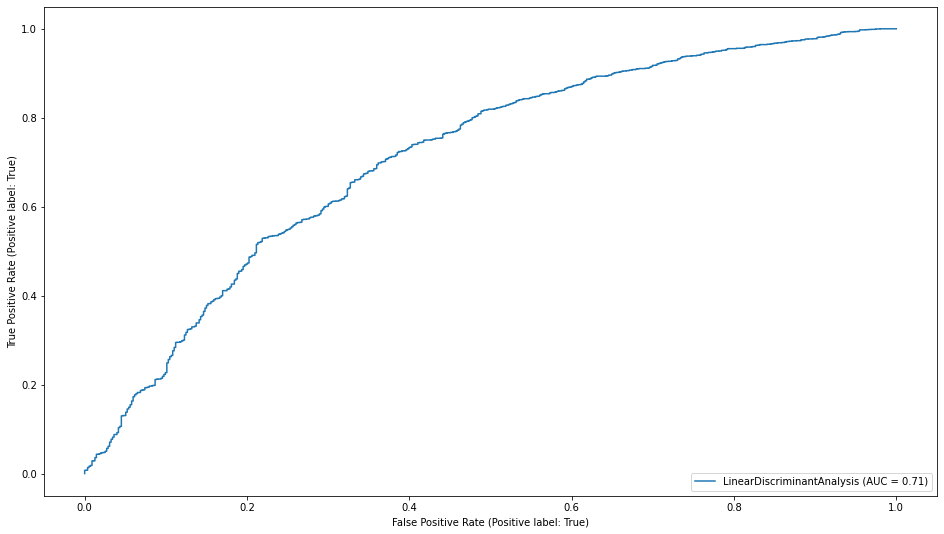

In [ ]:

#Given smote, we have to do a little adjustment
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
lda.fit(X_train, Y_train)

lda_prediction=lda.predict(X_test)

evaluate_model (lda, X_test, y_test, lda_prediction)

**Gaussian Naive Bayes**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.819281045751634
2. confusion_matrix:
[[   0    0]
 [ 553 2507]]
3. recall_score:  0.819281045751634
4. precision_score:  1.0
5. f1_score:  0.9006646308604275
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


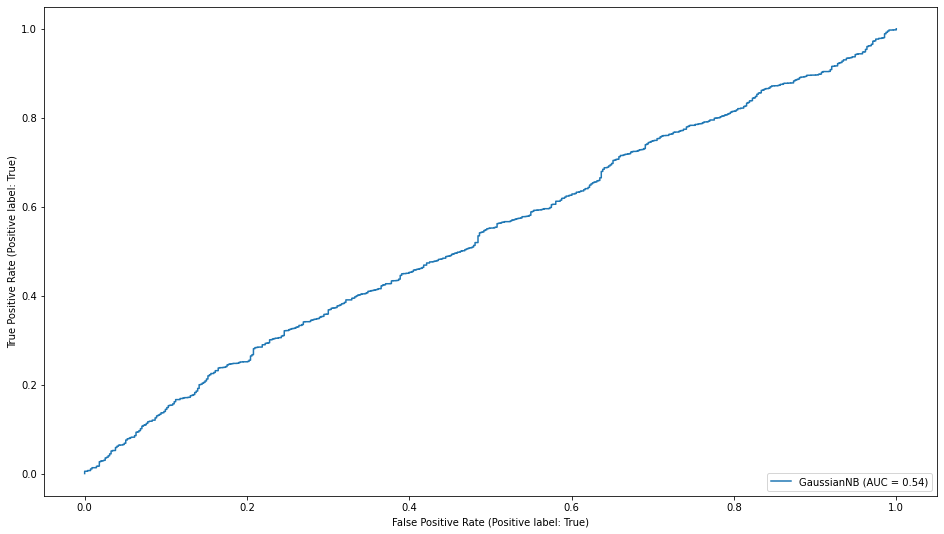

In [ ]:
#Given smote, we have to do a little adjustment
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=123)


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

gnbprediction=gnb.predict(X_test)

evaluate_model (gnb, X_test, y_test, gnbprediction)



**Decision Tree Classifier**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.7480392156862745
2. confusion_matrix:
[[ 204  422]
 [ 349 2085]]
3. recall_score:  0.8566146261298274
4. precision_score:  0.8316713203031512
5. f1_score:  0.8439587128111717
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


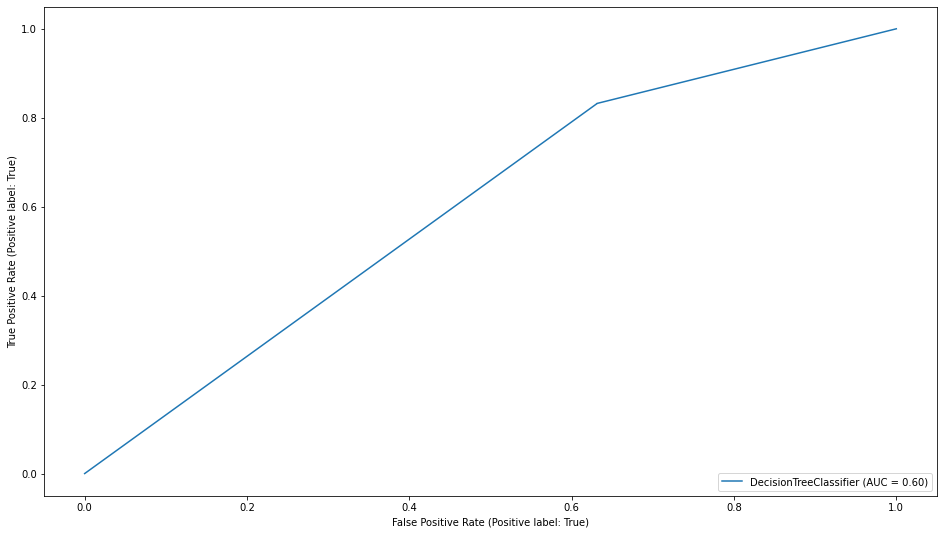

In [ ]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

#importing module
from sklearn.tree import DecisionTreeClassifier
#making the instance
dtc= DecisionTreeClassifier(random_state=1234)
#learning
dtc.fit(X_train,Y_train)
#Prediction
dtcprediction=dtc.predict(X_test)

evaluate_model (dtc, X_test, y_test, dtcprediction)


**Random Forest Classifier**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8444444444444444
2. confusion_matrix:
[[ 186  109]
 [ 367 2398]]
3. recall_score:  0.8672694394213382
4. precision_score:  0.9565217391304348
5. f1_score:  0.9097116843702581
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


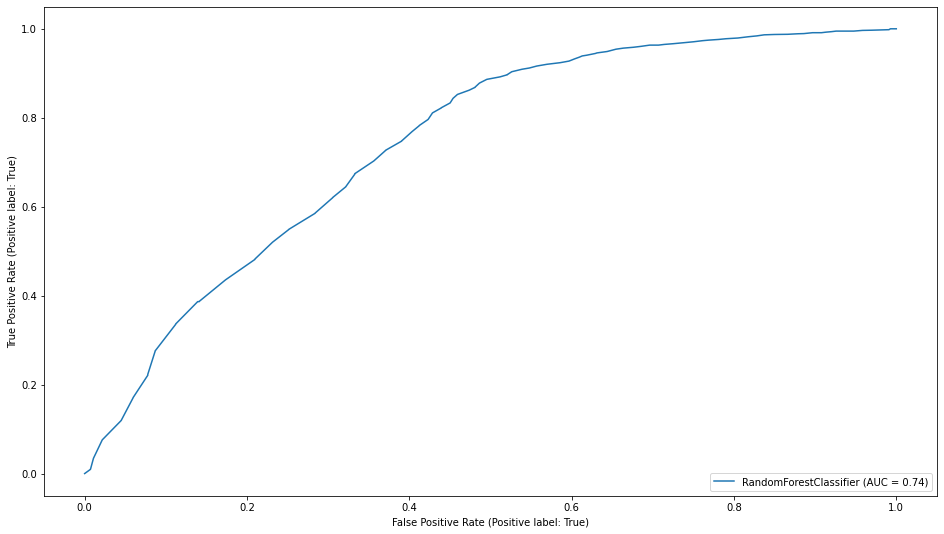

In [ ]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

#importing module
from sklearn.ensemble import RandomForestClassifier
#making the instance
rfc=RandomForestClassifier(n_jobs=-1,random_state=123)
#learning
rfc.fit(X_train,Y_train)
#Prediction
rfcprediction=rfc.predict(X_test)

evaluate_model (rfc, X_test, y_test, rfcprediction)


**SVM Classifier**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.819281045751634
2. confusion_matrix:
[[   0    0]
 [ 553 2507]]
3. recall_score:  0.819281045751634
4. precision_score:  1.0
5. f1_score:  0.9006646308604275
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


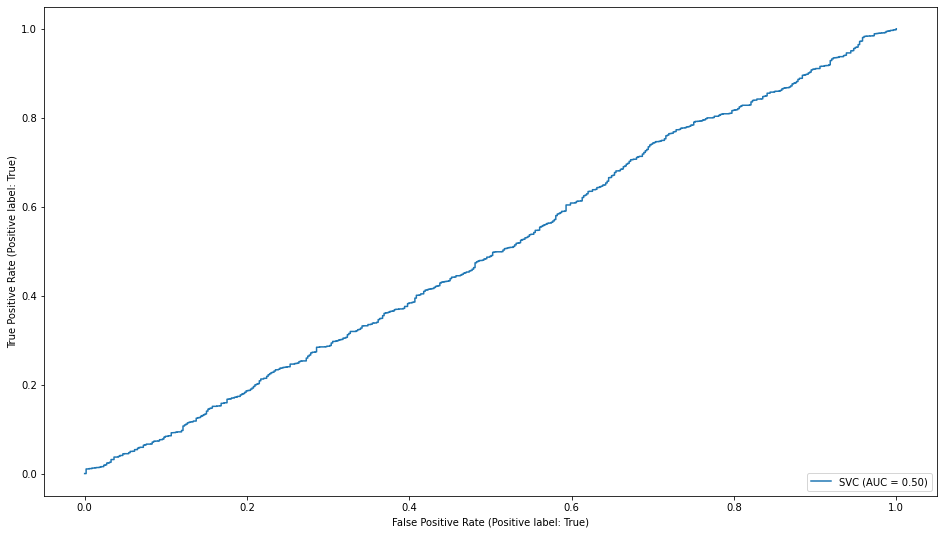

In [ ]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

#importing module
from sklearn import svm
#making the instance
svc = svm.SVC(random_state=123)
#learning
svc.fit(X_train,Y_train)
#Prediction
svcprediction=svc.predict(X_test)

evaluate_model (svc, X_test, y_test, svcprediction)

**K-NearestNeighbours Classifier**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.796078431372549
2. confusion_matrix:
[[  71  142]
 [ 482 2365]]
3. recall_score:  0.8306989813839128
4. precision_score:  0.9433585959313922
5. f1_score:  0.883451624953306
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


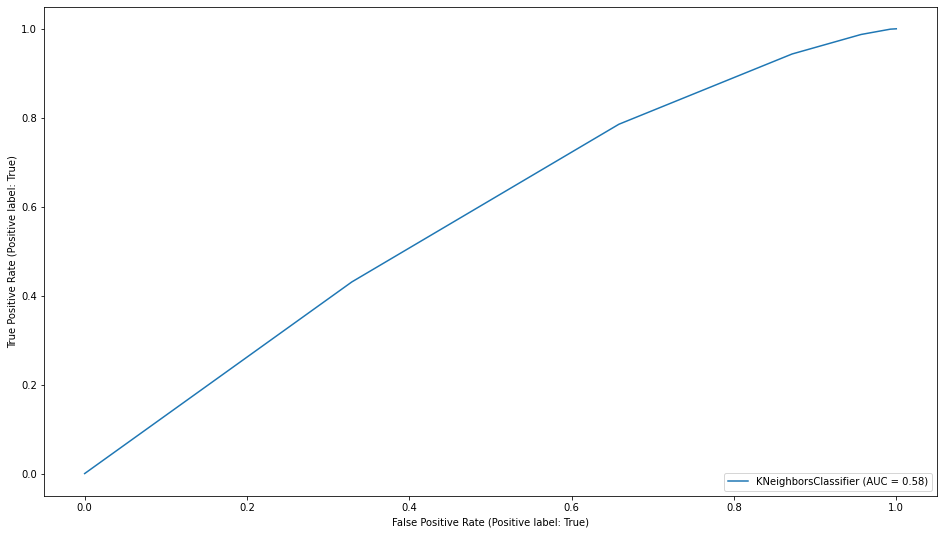

In [ ]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

#importing module
from sklearn.neighbors import KNeighborsClassifier
#making the instance
knn = KNeighborsClassifier()
#learning
knn.fit(X_train,Y_train)
#Prediction
knnprediction=knn.predict(X_test)

evaluate_model (knn, X_test, y_test, knnprediction)

**Ada Boost**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8415032679738562
2. confusion_matrix:
[[ 144   76]
 [ 409 2431]]
3. recall_score:  0.8559859154929578
4. precision_score:  0.9696848823294775
5. f1_score:  0.9092949317374228
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


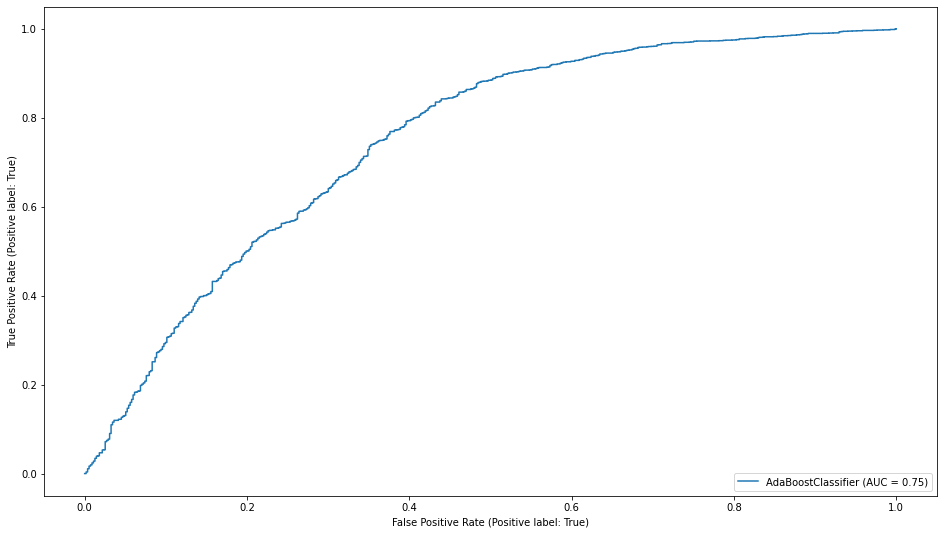

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

ada_model = AdaBoostClassifier(n_estimators=200, random_state=44)

#learning
ada_model.fit(X_train,Y_train)
#Prediction
ada_modelprediction=ada_model.predict(X_test)

evaluate_model (ada_model, X_test, y_test, ada_modelprediction)

**XGB Classifier**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8470588235294118
2. confusion_matrix:
[[ 186  101]
 [ 367 2406]]
3. recall_score:  0.8676523620627479
4. precision_score:  0.9597128041483846
5. f1_score:  0.9113636363636365
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


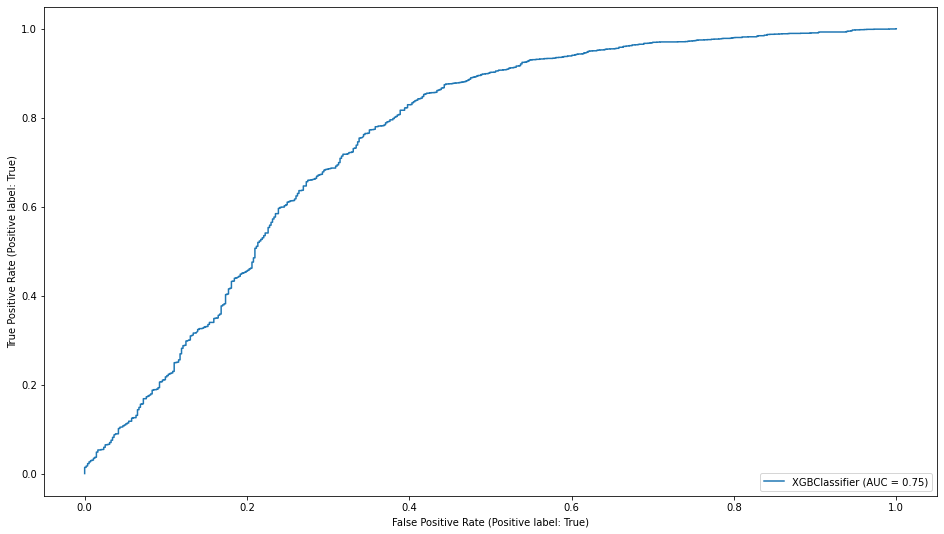

In [ ]:
from xgboost import XGBClassifier

# X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

XGB = XGBClassifier(objective='binary:logistic',scale_pos_weight=1,n_estimators=85, eta=0.3, subsample=1, colsample_bytree=1)

#learning
XGB.fit(np.array(X_train), np.array(y_train))
#Prediction
XGB_modelprediction=XGB.predict(np.array(X_test))

evaluate_model (XGB, np.array(X_test), np.array(y_test), XGB_modelprediction)

**Light GBM**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)


In [ ]:
 X_test.shape

(3060, 17)

In [ ]:
y_train.value_counts()

True     5840
False    1300
Name: label_result, dtype: int64

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.3199346405228758
2. confusion_matrix:
[[ 513 2041]
 [  40  466]]
3. recall_score:  0.9209486166007905
4. precision_score:  0.18587953729557238
5. f1_score:  0.3093262529040823
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


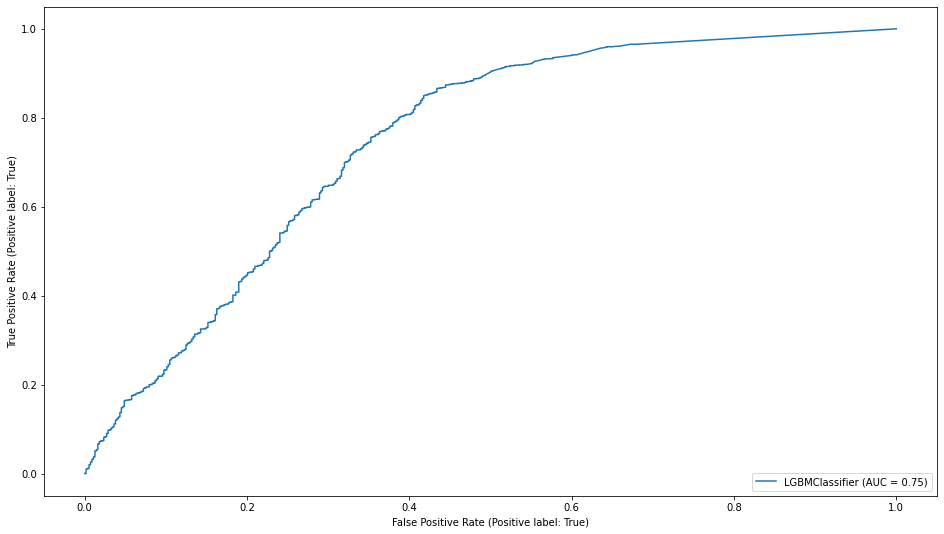

In [ ]:
from lightgbm import LGBMClassifier

# X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

lgbm_clf = LGBMClassifier(n_estimators=1000, objective='binary',
                          class_weight={0:25, 1:1}, learning_rate=0.01,
                          boosting_type='dart')
lgbm_clf.fit(np.array(X_train), np.array(y_train))

#Prediction
LGBM_modelprediction=lgbm_clf.predict(X_test)

evaluate_model (lgbm_clf, X_test, y_test, LGBM_modelprediction)

In [ ]:
lgbm_clf.predict_proba(X_test)

array([[0.73406666, 0.26593334],
       [0.78288525, 0.21711475],
       [0.66894026, 0.33105974],
       ...,
       [0.63222065, 0.36777935],
       [0.93817218, 0.06182782],
       [0.73071458, 0.26928542]])

In [ ]:
Y_dev.value_counts()

True     1171
False     257
Name: label_result, dtype: int64

**Votting Classifier**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, VotingClassifier

clf1 = RandomForestClassifier(n_estimators=200, class_weight={0: 100, 1: 1})
clf2 = GradientBoostingClassifier(n_estimators=1000, max_depth=7)
clf3 = ExtraTreesClassifier(n_estimators=1000, class_weight={0: 100, 1: 1})
clf4 = XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.01)
pos_clf = VotingClassifier(estimators=[('pos', clf1), ('gb', clf2),
                                        ('et', clf3), ('xgb', clf4)],
                            voting='soft',
                            weights=[1, 2, 1, 1])

pos_clf.fit(X_train, y_train)

#Prediction
Vot_modelprediction=pos_clf.predict(X_test)


In [ ]:
y_test.value_counts()

True     2507
False     553
Name: label_result, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
import numpy as np

In [ ]:
# Train Model

# soft voting
clf1 = RandomForestClassifier(n_estimators=200, class_weight={0: 100, 1: 1})
clf2 = GradientBoostingClassifier(n_estimators=1000, max_depth=7)
clf3 = ExtraTreesClassifier(n_estimators=1000, class_weight={0: 100, 1: 1})
clf4 = XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.01)
pos_clf = VotingClassifier(estimators=[('pos', clf1), ('gb', clf2),
                                        ('et', clf3), ('xgb', clf4)],
                            voting='soft',
                            weights=[1, 2, 1, 1])
pos_clf.fit(np.array(X_train), np.array(y_train))

# LightGBM
neg_clf = LGBMClassifier(n_estimators=1000, objective='binary',
                          class_weight={0:25, 1:1}, learning_rate=0.01,
                          boosting_type='dart')
neg_clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight={0: 25, 1: 1},
               learning_rate=0.01, n_estimators=1000, objective='binary')

In [ ]:
pos_clf = pos_clf.predict_proba(np.array(X_test))

In [ ]:
neg_clf = neg_clf.predict_proba(np.array(X_test))

In [ ]:
pos_clf

array([[0.09228962, 0.90771038],
       [0.11287449, 0.88712551],
       [0.03573617, 0.96426383],
       ...,
       [0.0325031 , 0.9674969 ],
       [0.72651531, 0.27348468],
       [0.07823262, 0.92176738]])

In [ ]:
neg_clf

array([[0.73406666, 0.26593334],
       [0.78288525, 0.21711475],
       [0.66894026, 0.33105974],
       ...,
       [0.63222065, 0.36777935],
       [0.93817218, 0.06182782],
       [0.73071458, 0.26928542]])

In [ ]:
len(X_test)

3060

***Label Result***

In [ ]:
label_result_pred = []

In [ ]:
# Test _ 1
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0

for i in range(0, len(X_test)):
  if pos_clf[i][1] >= 0.845:
    label_result_pred.append(True)
  else:
    if neg_clf[i][0] >= 0.9:
      label_result_pred.append(False)
    else:
      merge = pos_clf[i][1] * 0.5 + neg_clf[i][1]*0.5
      if merge >= 0.5:
          label_result_pred.append(True)
      else:
          label_result_pred.append(False)

In [ ]:
label_result_pred

In [ ]:
y_test.values

array([False,  True,  True, ...,  True, False,  True])

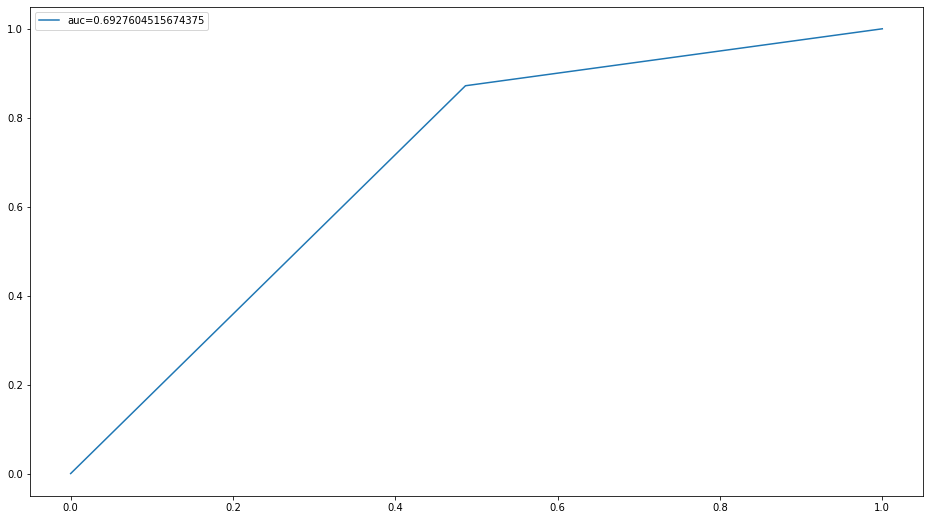

In [ ]:
from sklearn.metrics import roc_curve

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test.values, label_result_pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

auc_keras

plt.plot(fpr_keras,tpr_keras,label="auc="+str(auc_keras))
plt.legend(loc=2)
plt.show()

In [ ]:
print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
#Accuracy
print("1. Accuracy:",metrics.accuracy_score(label_result_pred,y_test.values))
# confusion_matrix
print('2. confusion_matrix:')
print(confusion_matrix(label_result_pred,y_test.values))
# recall_score
print('3. recall_score: ', recall_score(label_result_pred,y_test.values))
# precision_score
print('4. precision_score: ', precision_score(label_result_pred,y_test.values))
# f1_score
print('5. f1_score: ', f1_score(label_result_pred,y_test.values))
# # ROC plot
# print('6. Biểu đồ ROC của mô hình:')
# metrics.plot_roc_curve(model, X_test, y_test)
# plt.show()

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8071895424836601
2. confusion_matrix:
[[ 284  321]
 [ 269 2186]]
3. recall_score:  0.8904276985743381
4. precision_score:  0.8719585161547666
5. f1_score:  0.8810963321241435


In [ ]:
np.array(y_test)[1]

True

In [ ]:
count_T = 0
count_F = 0
for i in range(0, len(y_test)):
  if np.array(y_test)[i] == True:
    count_T += 1
  else:
    count_F += 1

x = count_T / (count_T + count_F)
print("True: ", count_T)
print("False: ", count_F)
print("Ti le True: ", x)

True:  2507
False:  553
Ti le True:  0.819281045751634


In [ ]:
count_1 = 0
count_2 = 0
count_3 = 0

y =[]
for i in range(len(X_test)):
  
  pos = pos_clf[i]
  neg = neg_clf[i]
  if pos[1] >= 0.845:
    y.append((1, pos[1], 'pos'))
    count_1 += 1
  elif neg[0] >= 0.90:  # 0.9 ==>> 418 False
    y.append((0, neg[0], 'neg'))
    count_2 += 1
  else: 
    merge = pos * 0.5 + neg*0.5
    # print("i = {} ==> {}", i, merge)
    label = np.argmax(merge)
    # print("i = {} ==> {}", i, label)
    # print("i = {} ==> {}", i, label,  merge[label])
    # # print(merge)
    # # count_3 += 1
    
   
    if label == 1 and merge[label] >= 0.845:
      merge[label] = 0.845
    elif label == 0 and merge[label] >= 0.95:
      merge[label] = 0.95
    if label == 1 and merge[label] >= 0.8:
      y.append(np.argmax(merge), merge[label], 'special_confusion')
    elif label == 0 and merge[label] >= 0.95:
      y.append(np.argmax(merge), merge[label], 'special_confusion')
    else: # not certain
      y.append((np.argmax(merge), merge[label], 'confuse'))

# print("1", count_1)
# print("2", count_2)
# print("3", count_3)

print(y)

[(1, 0.9077103806251093, 'pos'), (1, 0.8871255135121554, 'pos'), (1, 0.9642638269675896, 'pos'), (1, 0.9848892595546881, 'pos'), (1, 0.9658700382913248, 'pos'), (1, 0.9729561060267242, 'pos'), (1, 0.9196452197498963, 'pos'), (1, 0.9453484579720246, 'pos'), (1, 0.9437100851679545, 'pos'), (1, 0.9779610677414645, 'pos'), (1, 0.9640343809673848, 'pos'), (0, 0.908491010110915, 'neg'), (1, 0.9269557558997666, 'pos'), (1, 0.8995793476807297, 'pos'), (1, 0.9397595561426595, 'pos'), (0, 0.947115643211946, 'neg'), (1, 0.8801206661747203, 'pos'), (1, 0.954394150331322, 'pos'), (1, 0.9331044817990624, 'pos'), (1, 0.9834890100445628, 'pos'), (0, 0.9025179869918046, 'neg'), (1, 0.965151814129601, 'pos'), (0, 0.6103418872255857, 'confuse'), (1, 0.9563902632428762, 'pos'), (1, 0.9556845192522033, 'pos'), (1, 0.9665090809217585, 'pos'), (0, 0.5352320806667787, 'confuse'), (1, 0.9304415802485899, 'pos'), (0, 0.947115643211946, 'neg'), (0, 0.947115643211946, 'neg'), (1, 0.9522487987633316, 'pos'), (1, 0

In [ ]:
y[0]

(1, 0.9077103806251093, 'pos')

In [ ]:
label_pred_finall = []
for i in range(0,len(y_test)):
  # print(y[i][0])
  label_pred_finall.append(y[i][0])

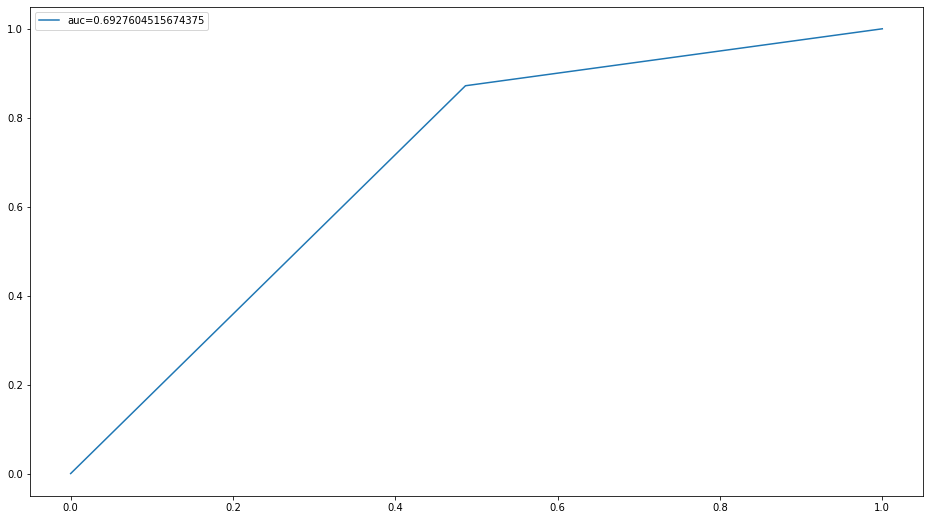

In [ ]:
from sklearn.metrics import roc_curve

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test.values, label_pred_finall)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

auc_keras

plt.plot(fpr_keras,tpr_keras,label="auc="+str(auc_keras))
plt.legend(loc=2)
plt.show()

In [ ]:
print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
#Accuracy
print("1. Accuracy:",metrics.accuracy_score(label_pred_finall,y_test.values))
# confusion_matrix
print('2. confusion_matrix:')
print(confusion_matrix(label_pred_finall,y_test.values))
# recall_score
print('3. recall_score: ', recall_score(label_pred_finall,y_test.values))
# precision_score
print('4. precision_score: ', precision_score(label_pred_finall,y_test.values))
# f1_score
print('5. f1_score: ', f1_score(label_pred_finall,y_test.values))
# # ROC plot
# print('6. Biểu đồ ROC của mô hình:')
# metrics.plot_roc_curve(model, X_test, y_test)
# plt.show()

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8071895424836601
2. confusion_matrix:
[[ 284  321]
 [ 269 2186]]
3. recall_score:  0.8904276985743381
4. precision_score:  0.8719585161547666
5. f1_score:  0.8810963321241435


In [ ]:
if True == 1:
  print(1)
else: 
  print(0)

1
